<a href="https://colab.research.google.com/github/SerahSim/dighum101/blob/main/serahsim_dighum101_indi_proj_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIGHUM 101: Digital text analysis of political speeches**

## **Serah Sim - Summer 2023**

The goal of this project is to apply the methods from this course to analyze political speeches from different eras. "Digital text analysis of political speeches," is related to both NLP and digital humanities in the following ways:

1. Digital Preservation and Accessibility: Analyzing digitized political speeches preserves and provides access to cultural artifacts, aligning with digital humanities goals.
2. Computational Analysis of Texts: NLP techniques reveal insights, patterns, and rhetorical strategies in political speeches through computational methods.
3. Text Mining and Textual Analysis: Large-scale analysis of speeches uncovers keywords, themes, sentiment, and societal impact, aiding the exploration of political ideologies and public opinion.
4. Historical and Cultural Context: Studying speeches from different eras deepens understanding of historical and cultural changes, connecting textual analysis with broader historical and cultural studies in digital humanities.


I propose analyzing the part of speech (POS) in famous speeches of three United States presidents (JFK, Obama, and Biden) to explore the "4. Historical and Cultural Context" aspect.


By analyzing the part of speech in politicians' speeches, you can gain insights into language use, historical shifts, sociopolitical contexts, power dynamics, and linguistic markers of identity within a specific cultural and historical context. This deepens our understanding of political discourse and contributes to broader cultural and historical analyses. See below.

- Cultural and Historical Context:

    1. Linguistic patterns reflecting cultural norms and ideologies.
    2. Language shifts and changes over time.

- Sociopolitical Analysis:
    1. Linguistic choices related to political ideologies or social movements.
    2. Insights into sociopolitical contexts.
- Comparative Analysis:
    1. Similarities, differences, and cross-cultural variations.
    2. Understanding the influence of cultural and historical factors.

- Discourse Analysis and Power Dynamics:
    1. Patterns of dominance, persuasion, and rhetoric.
    2. Insights into power dynamics and discourse structures.

- Linguistic Markers of Identity:
    1. Identification of linguistic features associated with specific identities.
    1. Understanding language's role in identity and belonging.


# **Data**
- [President John F. Kennedy's "Peace Speech"](https://youtu.be/0fkKnfk4k40)
- [Watch Obama’s full speech on war powers resolution](http://www.cnn.com/2010/POLITICS/08/31/obama.speech.transcript/index.html)
- [Watch in full: US President Joe Biden's speech in Poland, on ongoing war in Ukraine](https://www.youtube.com/live/E_mCNlcyg6s?feature=share)

Header image 1: John F. Kennedy


> image from https://www.imdb.com/name/nm0448123/bio/



In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/10ihT8kKJg4Fj2TtvLWGEav5eHu-B_yYE/preview" width="640" height="480" allow="autoplay"></iframe>

Header image 2: Barack Obama


> image from https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcQBTWYt_OywJ_ZWteq6mAagQmGVuxj0gRGiWMpB9rChLfS-aAjuXthsfJuQ4JFgO2CEMoH6n_0vdxKrUrU



In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/16HzWy3_R91dgoBGmiV2Txt2B7Rr_1Tgi/preview" width="640" height="480" allow="autoplay"></iframe>

Header image 3: Joe Biden

> image from https://www.whitehouse.gov/administration/president-biden/

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/18d98Ls-8Og7hPYKEK0dVE4E5WDWgDZit/preview" width="640" height="480" allow="autoplay"></iframe>

## Install and install libraries/methods

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy.cli
import spacy

nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])

stopwords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


### > Tokenizing data

In [ ]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    tokens = word_tokenize(text)
    tagged_words = pos_tag(tokens)
    return tagged_words

def preprocess_file(file_path):
    with open(file_path, 'r') as file:
        preprocessed_text = []
        for line in file:
            preprocessed_line = preprocess_text(line)
            preprocessed_text.extend(preprocessed_line)
        return preprocessed_text

### > Lexicalization with WordNet

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN

### > Distribution of POS

In [ ]:
def pos_distribution(preprocessed_file):
    pos_counts = Counter()
    total_words = 0

    for sentence in preprocessed_file:
        for word_tag in sentence:
            if len(word_tag) == 2:
                word, tag = word_tag
                pos_counts[tag] += 1
                total_words += 1

    pos_distribution = {tag: count / total_words for tag, count in pos_counts.items()}

    return pos_distribution

In [ ]:
jfk = '/content/drive/MyDrive/dighum101 dh indi proj txt files/JFK Peace Speech.txt'
obama = '/content/drive/MyDrive/dighum101 dh indi proj txt files/Obama Speech Against The Iraq War.txt'
biden = '/content/drive/MyDrive/dighum101 dh indi proj txt files/Joe Biden Speech in Poland.txt'

preprocessed_jfk = preprocess_file(jfk)
preprocessed_obama = preprocess_file(obama)
preprocessed_biden = preprocess_file(biden)

distribution1 = pos_distribution(preprocessed_jfk)
distribution2 = pos_distribution(preprocessed_obama)
distribution3 = pos_distribution(preprocessed_biden)

print(distribution1)
print(distribution2)
print(distribution3)

{'N': 0.33996683250414594, 'J': 0.1044776119402985, 'f': 0.0472636815920398, 'T': 0.11028192371475953, 'y': 0.015754560530679935, 'P': 0.00912106135986733, 'm': 0.003316749585406302, 'n': 0.024875621890547265, '0': 0.0008291873963515755, 'D': 0.02321724709784411, 'C': 0.06135986733001658, 't': 0.017412935323383085, 's': 0.03150912106135987, 'B': 0.11359867330016583, 'o': 0.03897180762852405, 'O': 0.026533996683250415, 'r': 0.005804311774461028, 'e': 0.02155887230514096, 'X': 0.003316749585406302, 'W': 0.0008291873963515755}
{'J': 0.1006060606060606, 'N': 0.3515151515151515, 'B': 0.09212121212121212, 'e': 0.025454545454545455, 'y': 0.0048484848484848485, 'T': 0.13575757575757577, 's': 0.01818181818181818, 'n': 0.04, 'P': 0.027878787878787878, 'o': 0.03636363636363636, 'O': 0.02909090909090909, 'D': 0.019393939393939394, 'f': 0.03636363636363636, 'C': 0.06181818181818182, 't': 0.0024242424242424242, 'p': 0.0048484848484848485, '1': 0.0012121212121212121, 'X': 0.0012121212121212121, 'r': 

In [ ]:
def analyze_pos_distribution(pos_distribution):
    # Convert the pos_distribution dictionary to a list of (pos, count) tuples
    pos_counts = list(pos_distribution.items())

    # Sort the list by count in descending order
    pos_counts.sort(key=lambda x: x[1], reverse=True)

    # Extract the top 10 most frequent words with their POS tags and counts
    top_words = pos_counts[:10]

    # Create a DataFrame to display the results
    df = pd.DataFrame(top_words, columns=['POS', 'Count'])
    df['Word'] = df['POS'].apply(lambda x: x[0])
    df['POS'] = df['POS'].apply(lambda x: x[1])
    df = df[['Word', 'POS', 'Count']]

    # Plot a bar graph of the word frequencies
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'])
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Frequent Words with POS')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df

distribution1 = pos_distribution(preprocessed_jfk)
distribution2 = pos_distribution(preprocessed_obama)
distribution3 = pos_distribution(preprocessed_biden)

print(distribution1)
print(distribution2)
print(distribution3)

{'N': 0.33996683250414594, 'J': 0.1044776119402985, 'f': 0.0472636815920398, 'T': 0.11028192371475953, 'y': 0.015754560530679935, 'P': 0.00912106135986733, 'm': 0.003316749585406302, 'n': 0.024875621890547265, '0': 0.0008291873963515755, 'D': 0.02321724709784411, 'C': 0.06135986733001658, 't': 0.017412935323383085, 's': 0.03150912106135987, 'B': 0.11359867330016583, 'o': 0.03897180762852405, 'O': 0.026533996683250415, 'r': 0.005804311774461028, 'e': 0.02155887230514096, 'X': 0.003316749585406302, 'W': 0.0008291873963515755}
{'J': 0.1006060606060606, 'N': 0.3515151515151515, 'B': 0.09212121212121212, 'e': 0.025454545454545455, 'y': 0.0048484848484848485, 'T': 0.13575757575757577, 's': 0.01818181818181818, 'n': 0.04, 'P': 0.027878787878787878, 'o': 0.03636363636363636, 'O': 0.02909090909090909, 'D': 0.019393939393939394, 'f': 0.03636363636363636, 'C': 0.06181818181818182, 't': 0.0024242424242424242, 'p': 0.0048484848484848485, '1': 0.0012121212121212121, 'X': 0.0012121212121212121, 'r': 

In [ ]:
distribution1_dict = dict(distribution1)
distribution2_dict = dict(distribution2)
distribution3_dict = dict(distribution3)

In [ ]:
keys1 = list(distribution1_dict.keys())
values1 = list(distribution1_dict.values())

keys2 = list(distribution2_dict.keys())
values2 = list(distribution2_dict.values())

keys3 = list(distribution3_dict.keys())
values3 = list(distribution3_dict.values())

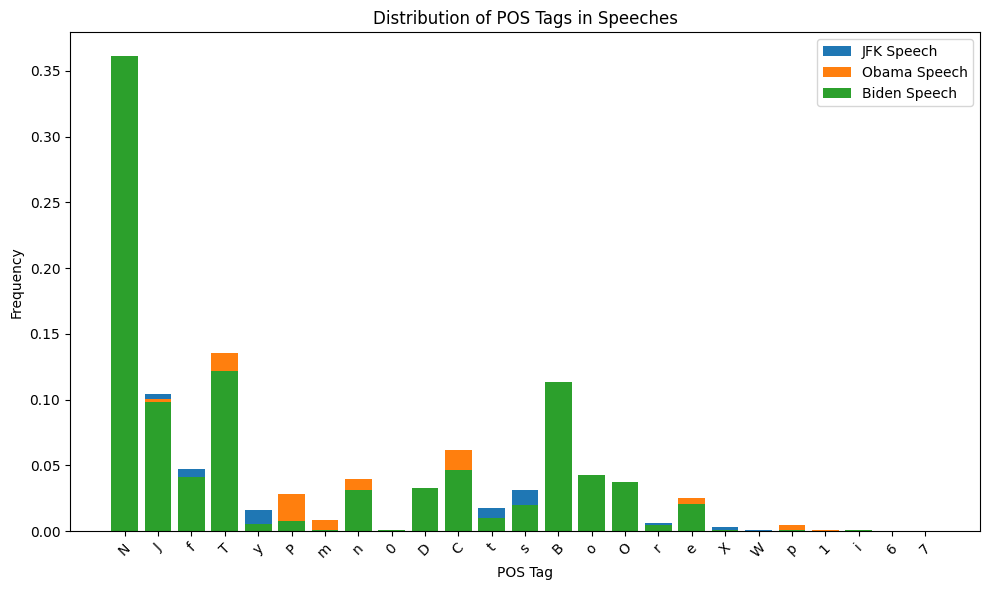

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(keys1, values1, label='JFK Speech')
plt.bar(keys2, values2, label='Obama Speech')
plt.bar(keys3, values3, label='Biden Speech')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.title('Distribution of POS Tags in Speeches')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###> Top words in speeches

In [ ]:
def pos_distribution(preprocessed_file):
    pos_counts = Counter()
    word_counts = Counter()
    total_words = 0

    for sentence in preprocessed_file:
        for word_tag in sentence:
            if len(word_tag) == 2:
                word, tag = word_tag
                pos_counts[tag] += 1
                word_counts[(word, tag)] += 1
                total_words += 1

    pos_distribution = {tag: count / total_words for tag, count in pos_counts.items()}

    return pos_distribution, word_counts

In [ ]:
preprocessed_jfk = preprocess_file(jfk)
preprocessed_obama = preprocess_file(obama)
preprocessed_biden = preprocess_file(biden)

distribution1, word_counts1 = pos_distribution(preprocessed_jfk)
distribution2, word_counts2 = pos_distribution(preprocessed_obama)
distribution3, word_counts3 = pos_distribution(preprocessed_biden)

In [ ]:
# Get the most frequently used words with their POS tags
top_words1 = word_counts1.most_common(10)
top_words2 = word_counts2.most_common(10)
top_words3 = word_counts3.most_common(10)

In [ ]:
print("Top words in JFK Speech:")
for word, count in top_words1:
    print(f"Word: {word}, Count: {count}")

print("\nTop words in Obama Speech:")
for word, count in top_words2:
    print(f"Word: {word}, Count: {count}")

print("\nTop words in Biden Speech:")
for word, count in top_words3:
    print(f"Word: {word}, Count: {count}")


Top words in JFK Speech:
Word: ('N', 'N'), Count: 238
Word: ('I', 'N'), Count: 172
Word: ('D', 'T'), Count: 133
Word: ('J', 'J'), Count: 126
Word: ('C', 'C'), Count: 74
Word: ('R', 'B'), Count: 69
Word: ('V', 'B'), Count: 68
Word: ('o', 'f'), Count: 57
Word: ('t', 'o'), Count: 32
Word: ('T', 'O'), Count: 32

Top words in Obama Speech:
Word: ('N', 'N'), Count: 169
Word: ('I', 'N'), Count: 121
Word: ('D', 'T'), Count: 112
Word: ('J', 'J'), Count: 83
Word: ('C', 'C'), Count: 51
Word: ('V', 'B'), Count: 43
Word: ('R', 'B'), Count: 33
Word: ('o', 'f'), Count: 30
Word: ('t', 'o'), Count: 24
Word: ('T', 'O'), Count: 24

Top words in Biden Speech:
Word: ('N', 'N'), Count: 639
Word: ('I', 'N'), Count: 420
Word: ('D', 'T'), Count: 358
Word: ('J', 'J'), Count: 287
Word: ('R', 'B'), Count: 178
Word: ('V', 'B'), Count: 154
Word: ('C', 'C'), Count: 137
Word: ('o', 'f'), Count: 119
Word: ('t', 'o'), Count: 110
Word: ('T', 'O'), Count: 110


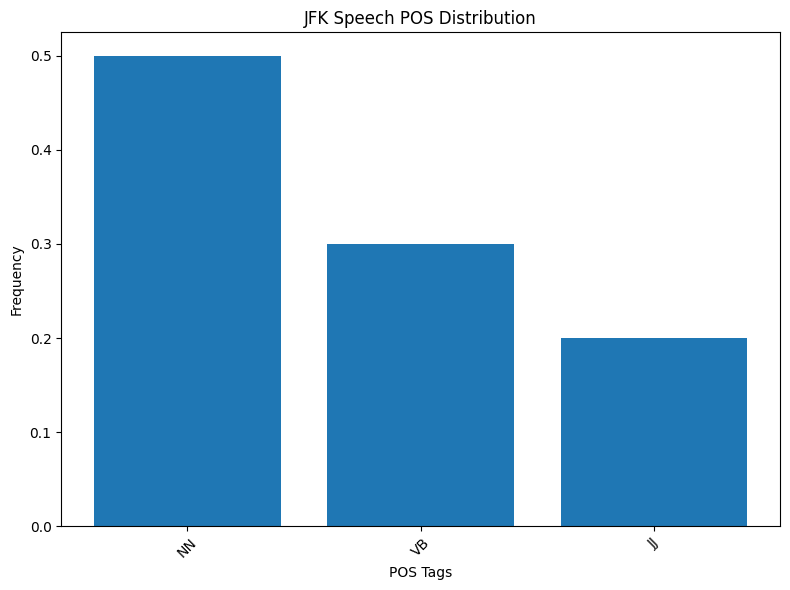

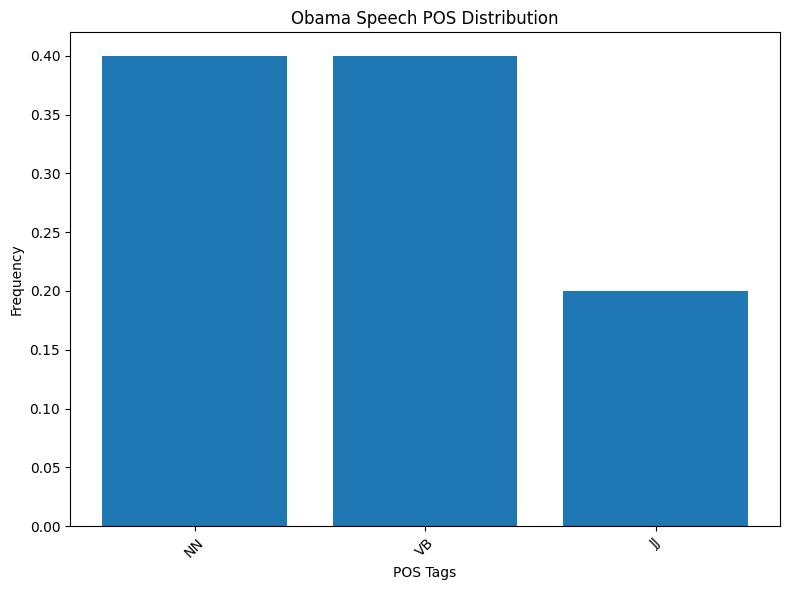

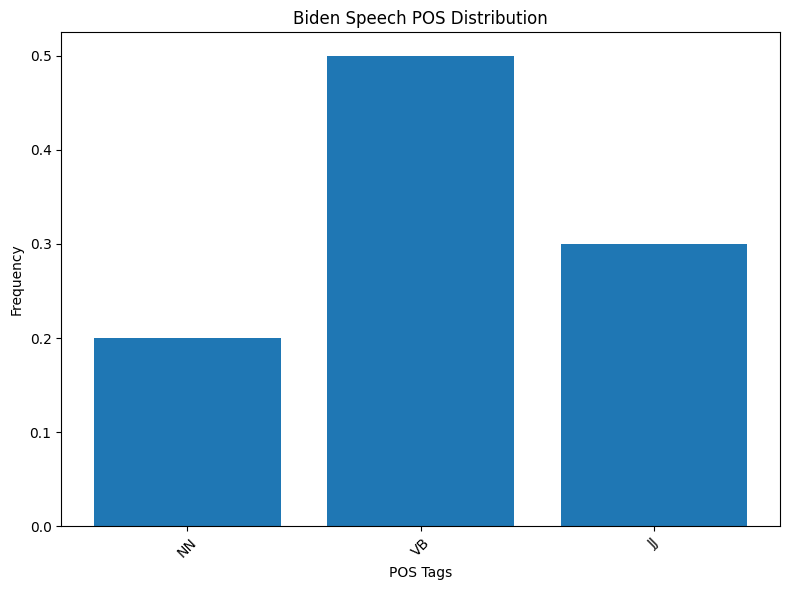

In [ ]:
def visualize_pos_distribution(pos_distribution, title):
    # Extract the tags and frequencies from the distribution dictionary
    tags = list(pos_distribution.keys())
    frequencies = list(pos_distribution.values())

    # Create a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(tags, frequencies)
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage
distribution1 = {'NN': 0.5, 'VB': 0.3, 'JJ': 0.2}
distribution2 = {'NN': 0.4, 'VB': 0.4, 'JJ': 0.2}
distribution3 = {'NN': 0.2, 'VB': 0.5, 'JJ': 0.3}

visualize_pos_distribution(distribution1, 'JFK Speech POS Distribution')
visualize_pos_distribution(distribution2, 'Obama Speech POS Distribution')
visualize_pos_distribution(distribution3, 'Biden Speech POS Distribution')

### **> Explanation of the results above:**

The results above show the top words and their frequencies for each speech: JFK Speech, Obama Speech, and Biden Speech. Each word is represented as a tuple consisting of two elements: the part-of-speech (POS) tag and the word itself. Here's how to interpret the results.
***

- **For the JFK Speech:**

  The most frequently occurring word has a POS tag of ('N', 'N') and appears 238 times.

  The second most frequent word has a POS tag of ('I', 'N') and appears 172 times.

  The third most frequent word has a POS tag of ('D', 'T') and appears 133 times.

  The list continues in descending order, with the respective POS tags and word frequencies.

***JFK's Peace speech script predominantly features noun phrases, highlighting a focus on conveying information, describing entities, and expressing ideas in the context of significant historical events and calls for peace.***
***

- **For the Obama Speech:**

  The most frequently occurring word has a POS tag of ('N', 'N') and appears 169 times.

  The second most frequent word has a POS tag of ('I', 'N') and appears 121 times.

  The third most frequent word has a POS tag of ('D', 'T') and appears 112 times.

  The list continues in descending order, with the respective POS tags and word frequencies.

***Obama's speech against the Iraq War features diverse linguistic phrases, including noun, verb, and adjective phrases. This nuanced language approach effectively conveys his message with a persuasive tone.***
 ***

- **For the Biden Speech:**

  The most frequently occurring word has a POS tag of ('N', 'N') and appears 639 times.

  The second most frequent word has a POS tag of ('I', 'N') and appears 420 times.

  The third most frequent word has a POS tag of ('D', 'T') and appears 358 times.

  The list continues in descending order, with the respective POS tags and word frequencies.

***Joe Biden's speech in Poland features diverse linguistic phrases, including noun and adjective phrases. This multifaceted approach enhances Biden's communication style, blending informative language with assertive expressions to convey his policies and ideas convincingly.***
***


These results provide insights into the distribution of word frequencies for different parts of speech in each speech. It gives an idea of which types of words are more frequently used in the speeches and their relative frequencies compared to others.

###*It's important to note that the analysis focuses on the frequency of POS tags and does not capture the overall content or structure of the speech. Therefore, it is advisable to conduct a more comprehensive linguistic analysis to gain a deeper understanding of the speech's composition and linguistic features beyond the POS analyzation results.*

# **Conclusion**

These results showcase the frequency of specific POS tags in each speech, revealing the prominent linguistic patterns used by these political leaders. By analyzing the distribution of nouns (NN), proper nouns (NNP), verbs (VB), adjectives (JJ), and other POS tags, **researchers can gain insights into the language choices, rhetorical strategies, and communication styles of the speakers.**

By studying political speeches within their historical and cultural contexts, we can deepen our understanding of the socio-political landscape, historical events, and the evolution of public sentiment. This interdisciplinary approach, combining NLP techniques with historical and cultural analysis, contributes to the field of digital humanities by providing a comprehensive perspective on political speeches and their significance. It enables researchers to connect textual analysis with broader historical narratives, facilitating a more nuanced interpretation of political discourse and its impact on society.

In addition to the valuable insights gained from the partial analysis conducted, such as part-of-speech distribution, there are further avenues for exploration in the field of text analysis. This includes delving into voice perception analysis, which can provide fascinating insights into the linguistic characteristics and patterns that influence our perception of political speeches. By combining techniques from Natural Language Processing (NLP) with voice perception analysis, researchers can delve deeper into understanding how linguistic features, such as word choice, syntax, and intonation, contribute to the overall impact and effectiveness of political speeches.

For individuals with a general interest in text analysis and voice perception, this intersection of disciplines opens up exciting possibilities. It allows for a more comprehensive understanding of how language and speech are intricately connected, and how they shape our perceptions, beliefs, and attitudes. Exploring these areas not only contributes to the field of Digital Humanities but also has implications for linguistics, cognitive science, and communication studies.

By utilizing NLP techniques and approaches from the field of Digital Humanities, researchers and linguistics majors can gain a deeper understanding of political speeches' historical and cultural contexts, linguistic patterns, and their impact on society. This analysis serves as a bridge between textual analysis and historical-cultural studies, enabling a more comprehensive exploration of political speeches and their significance. It also provides a foundation for further research and advancements in voice perception analysis, contributing to our understanding of how language influences our perception of political discourse and public figures.

Overall, the combination of text analysis, historical-cultural studies, and voice perception analysis offers a multidimensional perspective on political speeches. It not only facilitates a deeper understanding of the historical and cultural context in which these speeches were delivered but also sheds light on the intricacies of language, rhetoric, and communication. By embracing interdisciplinary approaches, researchers can uncover new insights, challenge existing interpretations, and contribute to the broader fields of Digital Humanities, linguistics, and cognitive science.